## Reproduce Fig. 2a
This notebook requires that you also have the unirep model code downloaded in the same parent directory as unirep_analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
import sys
import palettable as pal
sys.path.append("../../")
from common.data_io_utils import int_to_aa
from common.plot_style_utils import set_pub_plot_context, rep_names, save_for_pub
%matplotlib inline
set_pub_plot_context()

In [2]:
embedding = np.load(
    "../../../unirep/weights/1900_weights/embed_matrix:0.npy"
)

In [3]:
embedding

array([[  9.45316315e-01,  -6.63625717e-01,  -2.47278929e-01,
         -7.91995525e-01,   2.66303062e-01,  -6.48389816e-01,
          4.97818947e-01,   3.40559959e-01,   2.15496302e-01,
         -8.56987476e-01],
       [  2.47727916e-01,   2.91514218e-01,  -1.54956985e+00,
          1.97414696e+00,  -1.40792584e+00,   2.25124645e+00,
         -1.05451334e+00,   1.93510687e+00,   4.79758024e-01,
          2.15207410e+00],
       [ -2.31151199e+00,  -1.17958856e+00,  -1.90466201e+00,
          2.24837735e-02,  -3.30140114e+00,   1.14425576e+00,
         -9.56838503e-02,   5.44212639e-01,   1.61270237e+00,
          1.16790402e+00],
       [ -3.86564660e+00,  -3.25616390e-01,  -1.91946840e+00,
          1.84373868e+00,  -1.43097150e+00,   1.78970170e+00,
          3.30955505e-01,   1.96048349e-01,  -2.27261912e-02,
          8.16308916e-01],
       [ -2.18217683e+00,  -8.51903439e-01,  -1.96932662e+00,
         -7.66986012e-01,  -2.51193452e+00,   8.31058264e-01,
         -8.23734924e-02

In [4]:
for i in range(len(embedding)):
    if i == 0:
        print("Padding")
    else:
        print(int_to_aa[i])

Padding
M
R
H
K
D
E
S
T
N
Q
C
U
G
P
A
V
I
F
Y
W
L
O
J
start
stop


In [5]:
just_aa_embedding = embedding[1:-2]
just_aa_embedding

array([[  2.47727916e-01,   2.91514218e-01,  -1.54956985e+00,
          1.97414696e+00,  -1.40792584e+00,   2.25124645e+00,
         -1.05451334e+00,   1.93510687e+00,   4.79758024e-01,
          2.15207410e+00],
       [ -2.31151199e+00,  -1.17958856e+00,  -1.90466201e+00,
          2.24837735e-02,  -3.30140114e+00,   1.14425576e+00,
         -9.56838503e-02,   5.44212639e-01,   1.61270237e+00,
          1.16790402e+00],
       [ -3.86564660e+00,  -3.25616390e-01,  -1.91946840e+00,
          1.84373868e+00,  -1.43097150e+00,   1.78970170e+00,
          3.30955505e-01,   1.96048349e-01,  -2.27261912e-02,
          8.16308916e-01],
       [ -2.18217683e+00,  -8.51903439e-01,  -1.96932662e+00,
         -7.66986012e-01,  -2.51193452e+00,   8.31058264e-01,
         -8.23734924e-02,   2.64200878e+00,   1.07054853e+00,
          1.48461843e+00],
       [ -2.90854955e+00,  -1.96655631e+00,  -1.33119142e+00,
          2.54007864e+00,   7.74336994e-01,   1.26690996e+00,
         -1.03924203e+00

In [6]:
pca = PCA(n_components=3)
components = pca.fit_transform(just_aa_embedding)

In [7]:
labels = [int_to_aa[i+1] for i in range(len(components))]
labels

['M',
 'R',
 'H',
 'K',
 'D',
 'E',
 'S',
 'T',
 'N',
 'Q',
 'C',
 'U',
 'G',
 'P',
 'A',
 'V',
 'I',
 'F',
 'Y',
 'W',
 'L',
 'O',
 'J']

In [8]:
aminos = pd.DataFrame({
    'x':components[:,0],
    'y':components[:,1],
    'z':components[:,2],
    'name':labels,
})

In [9]:
#http://rosalind.info/glossary/amino-acid/
group_std = {
    'R':"Positively Charged",
    'H':"Positively Charged",
    'K':"Positively Charged",
    'D':"Negatively Charged",
    'E':"Negatively Charged",
    'S':"Polar Uncharged",
    'T':"Polar Uncharged",
    'N':"Polar Uncharged",
    'Q':"Polar Uncharged",
    'A':"Hydrophobic",
    'V':"Hydrophobic",
    'I':"Hydrophobic",  
    'L':"Hydrophobic",
    'M':"Hydrophobic",
    'F':"Hydrophobic",
    'Y':"Hydrophobic",
    'W':"Hydrophobic",
    'C':"Special",
    'U':"Special",
    'G':"Special",
    'P':"Special",
    'J':"Special",
    'O':"Exotic"
}

#https://www.sigmaaldrich.com/life-science/metabolomics/learning-center/amino-acid-reference-chart.html
group_sigma = {
    'R':"Charged Basic",
    'H':"Charged Basic",
    'K':"Charged Basic",
    'D':"Charged Acidic",
    'E':"Charged Acidic",
    'S':"Polar Neutral",
    'T':"Polar Neutral",
    'N':"Polar Neutral",
    'Q':"Polar Neutral",
    'A':"Hydrophobic Aliphatic",
    'V':"Hydrophobic Aliphatic",
    'I':"Hydrophobic Aliphatic",  
    'L':"Hydrophobic Aliphatic",
    'M':"Hydrophobic Aliphatic",
    'F':"Hydrophobic Aromatic",
    'Y':"Hydrophobic Aromatic",
    'W':"Hydrophobic Aromatic",
    'C':"Polar Neutral",
    'U':"Exotic",
    'G':"Unique",
    'P':"Unique",
    'J':"Exotic",
    'O':"Exotic"
}

In [10]:
aminos['group1'] = aminos['name'].map(lambda x: group_std[x])
aminos['group2'] = aminos['name'].map(lambda x: group_sigma[x])
aminos

,x,y,z,name,group1,group2
0,0.015929,-0.074587,-1.990408,M,Hydrophobic,Hydrophobic Aliphatic
1,-1.005084,-0.461693,0.757691,R,Positively Charged,Charged Basic
2,-1.538861,0.482779,1.729902,H,Positively Charged,Charged Basic
3,-0.620443,-1.603575,-0.483404,K,Positively Charged,Charged Basic
4,-1.029332,-1.485262,0.617970,D,Negatively Charged,Charged Acidic
5,-0.567362,-1.390708,-0.793141,E,Negatively Charged,Charged Acidic
6,-0.459379,-1.173697,-0.058766,S,Polar Uncharged,Polar Neutral
7,-0.340785,-0.819831,-0.045377,T,Polar Uncharged,Polar Neutral
8,-1.026818,-2.192708,0.556027,N,Polar Uncharged,Polar Neutral
9,-0.658888,-1.434774,-1.064349,Q,Polar Uncharged,Polar Neutral


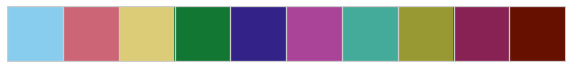

In [11]:
sns.palplot(sns.color_palette())

In [12]:
sns.color_palette()[1]

(0.80000000000000004, 0.40000000000000002, 0.46666666666666667)

Hydrophobic
           x         y         z name       group1                 group2
0   0.015929 -0.074587 -1.990408    M  Hydrophobic  Hydrophobic Aliphatic
14  0.104975 -0.247692  0.305413    A  Hydrophobic  Hydrophobic Aliphatic
15  0.250399  0.422106 -0.485739    V  Hydrophobic  Hydrophobic Aliphatic
16  0.190969  0.396031 -1.140072    I  Hydrophobic  Hydrophobic Aliphatic
17 -0.633769  2.419595 -1.504569    F  Hydrophobic   Hydrophobic Aromatic
18 -1.006471  2.496876 -0.813862    Y  Hydrophobic   Hydrophobic Aromatic
19 -1.212677  3.839660 -0.798126    W  Hydrophobic   Hydrophobic Aromatic
20 -0.128878  0.609291 -0.945907    L  Hydrophobic  Hydrophobic Aliphatic
Positively Charged
          x         y         z name              group1         group2
1 -1.005084 -0.461693  0.757691    R  Positively Charged  Charged Basic
2 -1.538861  0.482779  1.729902    H  Positively Charged  Charged Basic
3 -0.620443 -1.603575 -0.483404    K  Positively Charged  Charged Basic
Negatively Char

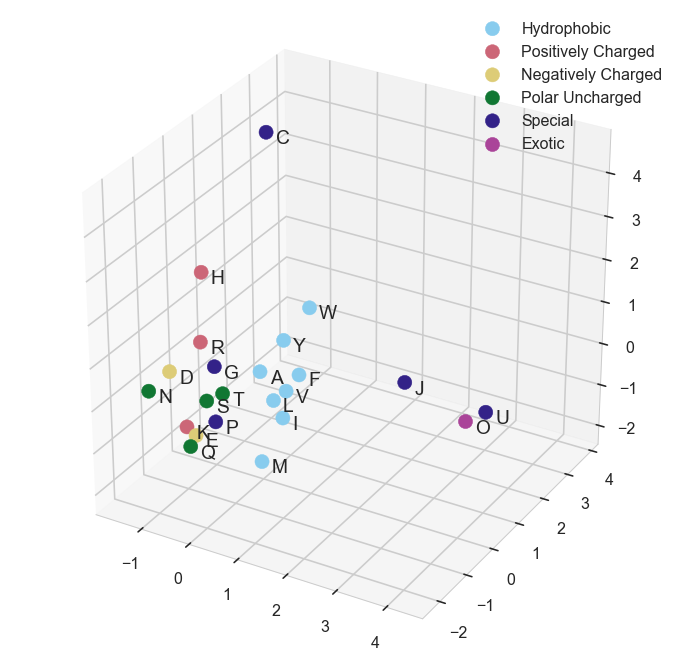

In [13]:
# Now plot a coloration for group 1
set_pub_plot_context(context="poster")
palette = sns.color_palette()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')
for i,g in enumerate(aminos.group1.unique()):
    print(g)
    group = aminos[aminos.group1 == g]
    print(group)
    ax.scatter(
        xs=group.x, 
        ys=group.y, 
        zs=group.z,
        label=g,
        s=200, 
        c=[palette[i]]*len(group),
        depthshade=False
    )
for i in range(len(components)):
    ax.text(aminos.x[i]+.2,aminos.y[i], aminos.z[i] -.2, aminos['name'][i])

ax.legend()

Hydrophobic Aliphatic
           x         y         z name       group1                 group2
0   0.015929 -0.074587 -1.990408    M  Hydrophobic  Hydrophobic Aliphatic
14  0.104975 -0.247692  0.305413    A  Hydrophobic  Hydrophobic Aliphatic
15  0.250399  0.422106 -0.485739    V  Hydrophobic  Hydrophobic Aliphatic
16  0.190969  0.396031 -1.140072    I  Hydrophobic  Hydrophobic Aliphatic
20 -0.128878  0.609291 -0.945907    L  Hydrophobic  Hydrophobic Aliphatic
Charged Basic
          x         y         z name              group1         group2
1 -1.005084 -0.461693  0.757691    R  Positively Charged  Charged Basic
2 -1.538861  0.482779  1.729902    H  Positively Charged  Charged Basic
3 -0.620443 -1.603575 -0.483404    K  Positively Charged  Charged Basic
Charged Acidic
          x         y         z name              group1          group2
4 -1.029332 -1.485262  0.617970    D  Negatively Charged  Charged Acidic
5 -0.567362 -1.390708 -0.793141    E  Negatively Charged  Charged Acidi

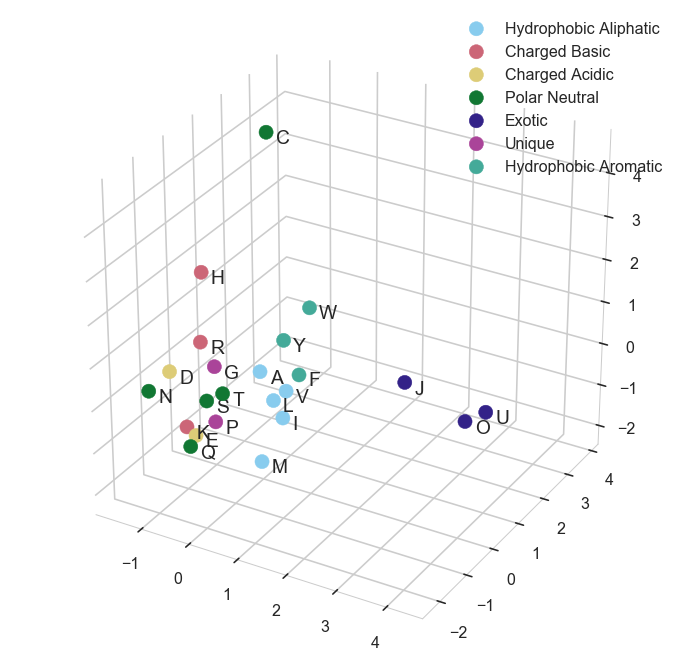

In [14]:
# Now plot a coloration for group 1
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')
for i,g in enumerate(aminos.group2.unique()):
    print(g)
    group = aminos[aminos.group2 == g]
    print(group)
    ax.scatter(
        xs=group.x, 
        ys=group.y, 
        zs=group.z,
        label=g,
        s=200, 
        c=[palette[i]]*len(group),
        depthshade=False
    )
for i in range(len(components)):
    ax.text(aminos.x[i]+.2,aminos.y[i], aminos.z[i] -.2, aminos['name'][i])

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.legend()

In [15]:
# Canonical
just_canonical = embedding[1:-2]
just_canonical

array([[  2.47727916e-01,   2.91514218e-01,  -1.54956985e+00,
          1.97414696e+00,  -1.40792584e+00,   2.25124645e+00,
         -1.05451334e+00,   1.93510687e+00,   4.79758024e-01,
          2.15207410e+00],
       [ -2.31151199e+00,  -1.17958856e+00,  -1.90466201e+00,
          2.24837735e-02,  -3.30140114e+00,   1.14425576e+00,
         -9.56838503e-02,   5.44212639e-01,   1.61270237e+00,
          1.16790402e+00],
       [ -3.86564660e+00,  -3.25616390e-01,  -1.91946840e+00,
          1.84373868e+00,  -1.43097150e+00,   1.78970170e+00,
          3.30955505e-01,   1.96048349e-01,  -2.27261912e-02,
          8.16308916e-01],
       [ -2.18217683e+00,  -8.51903439e-01,  -1.96932662e+00,
         -7.66986012e-01,  -2.51193452e+00,   8.31058264e-01,
         -8.23734924e-02,   2.64200878e+00,   1.07054853e+00,
          1.48461843e+00],
       [ -2.90854955e+00,  -1.96655631e+00,  -1.33119142e+00,
          2.54007864e+00,   7.74336994e-01,   1.26690996e+00,
         -1.03924203e+00

In [16]:
aminos2 = pd.concat([aminos, pd.DataFrame(just_aa_embedding)], axis=1)
aminos2

,x,y,z,name,group1,group2,0,1,2,3,4,5,6,7,8,9
0,0.015929,-0.074587,-1.990408,M,Hydrophobic,Hydrophobic Aliphatic,0.247728,0.291514,-1.549570,1.974147,-1.407926,2.251246,-1.054513,1.935107,0.479758,2.152074
1,-1.005084,-0.461693,0.757691,R,Positively Charged,Charged Basic,-2.311512,-1.179589,-1.904662,0.022484,-3.301401,1.144256,-0.095684,0.544213,1.612702,1.167904
2,-1.538861,0.482779,1.729902,H,Positively Charged,Charged Basic,-3.865647,-0.325616,-1.919468,1.843739,-1.430972,1.789702,0.330956,0.196048,-0.022726,0.816309
3,-0.620443,-1.603575,-0.483404,K,Positively Charged,Charged Basic,-2.182177,-0.851903,-1.969327,-0.766986,-2.511935,0.831058,-0.082373,2.642009,1.070549,1.484618
4,-1.029332,-1.485262,0.617970,D,Negatively Charged,Charged Acidic,-2.908550,-1.966556,-1.331191,2.540079,0.774337,1.266910,-1.039242,2.162403,1.637530,-0.118017
5,-0.567362,-1.390708,-0.793141,E,Negatively Charged,Charged Acidic,-1.385892,-1.954369,-1.305575,1.873060,-1.608055,0.920304,-1.517019,2.754740,1.563144,-0.314723
6,-0.459379,-1.173697,-0.058766,S,Polar Uncharged,Polar Neutral,-0.968939,-1.692395,-2.187699,2.078888,-0.881337,0.566205,0.835459,1.637209,-0.175907,2.506425
7,-0.340785,-0.819831,-0.045377,T,Polar Uncharged,Polar Neutral,-0.632925,-1.623636,-2.801617,2.166514,-0.492076,1.047555,-0.275236,0.811141,-0.126131,2.519896
8,-1.026818,-2.192708,0.556027,N,Polar Uncharged,Polar Neutral,-2.860989,0.354505,-2.630805,1.691306,0.231517,0.750410,0.319960,1.760599,1.388717,1.993914
9,-0.658888,-1.434774,-1.064349,Q,Polar Uncharged,Polar Neutral,-0.666028,-0.561055,-2.587193,1.828591,-2.144677,0.944410,-0.349410,1.814099,1.662777,0.796218


In [17]:
aminos2 = aminos2[~aminos2['name'].isin(["J","O","U"])].reset_index(drop=True)
aminos2

,x,y,z,name,group1,group2,0,1,2,3,4,5,6,7,8,9
0,0.015929,-0.074587,-1.990408,M,Hydrophobic,Hydrophobic Aliphatic,0.247728,0.291514,-1.549570,1.974147,-1.407926,2.251246,-1.054513,1.935107,0.479758,2.152074
1,-1.005084,-0.461693,0.757691,R,Positively Charged,Charged Basic,-2.311512,-1.179589,-1.904662,0.022484,-3.301401,1.144256,-0.095684,0.544213,1.612702,1.167904
2,-1.538861,0.482779,1.729902,H,Positively Charged,Charged Basic,-3.865647,-0.325616,-1.919468,1.843739,-1.430972,1.789702,0.330956,0.196048,-0.022726,0.816309
3,-0.620443,-1.603575,-0.483404,K,Positively Charged,Charged Basic,-2.182177,-0.851903,-1.969327,-0.766986,-2.511935,0.831058,-0.082373,2.642009,1.070549,1.484618
4,-1.029332,-1.485262,0.617970,D,Negatively Charged,Charged Acidic,-2.908550,-1.966556,-1.331191,2.540079,0.774337,1.266910,-1.039242,2.162403,1.637530,-0.118017
5,-0.567362,-1.390708,-0.793141,E,Negatively Charged,Charged Acidic,-1.385892,-1.954369,-1.305575,1.873060,-1.608055,0.920304,-1.517019,2.754740,1.563144,-0.314723
6,-0.459379,-1.173697,-0.058766,S,Polar Uncharged,Polar Neutral,-0.968939,-1.692395,-2.187699,2.078888,-0.881337,0.566205,0.835459,1.637209,-0.175907,2.506425
7,-0.340785,-0.819831,-0.045377,T,Polar Uncharged,Polar Neutral,-0.632925,-1.623636,-2.801617,2.166514,-0.492076,1.047555,-0.275236,0.811141,-0.126131,2.519896
8,-1.026818,-2.192708,0.556027,N,Polar Uncharged,Polar Neutral,-2.860989,0.354505,-2.630805,1.691306,0.231517,0.750410,0.319960,1.760599,1.388717,1.993914
9,-0.658888,-1.434774,-1.064349,Q,Polar Uncharged,Polar Neutral,-0.666028,-0.561055,-2.587193,1.828591,-2.144677,0.944410,-0.349410,1.814099,1.662777,0.796218


In [18]:
display(aminos2.iloc[:,-10:])
aminos2.loc[:,['x','y','z']] = pca.fit_transform(aminos2.iloc[:,-10:])

,0,1,2,3,4,5,6,7,8,9
0,0.247728,0.291514,-1.549570,1.974147,-1.407926,2.251246,-1.054513,1.935107,0.479758,2.152074
1,-2.311512,-1.179589,-1.904662,0.022484,-3.301401,1.144256,-0.095684,0.544213,1.612702,1.167904
2,-3.865647,-0.325616,-1.919468,1.843739,-1.430972,1.789702,0.330956,0.196048,-0.022726,0.816309
3,-2.182177,-0.851903,-1.969327,-0.766986,-2.511935,0.831058,-0.082373,2.642009,1.070549,1.484618
4,-2.908550,-1.966556,-1.331191,2.540079,0.774337,1.266910,-1.039242,2.162403,1.637530,-0.118017
5,-1.385892,-1.954369,-1.305575,1.873060,-1.608055,0.920304,-1.517019,2.754740,1.563144,-0.314723
6,-0.968939,-1.692395,-2.187699,2.078888,-0.881337,0.566205,0.835459,1.637209,-0.175907,2.506425
7,-0.632925,-1.623636,-2.801617,2.166514,-0.492076,1.047555,-0.275236,0.811141,-0.126131,2.519896
8,-2.860989,0.354505,-2.630805,1.691306,0.231517,0.750410,0.319960,1.760599,1.388717,1.993914
9,-0.666028,-0.561055,-2.587193,1.828591,-2.144677,0.944410,-0.349410,1.814099,1.662777,0.796218


Hydrophobic Aliphatic
           x         y         z name       group1                 group2  \
0  -0.160024 -2.014909  0.553458    M  Hydrophobic  Hydrophobic Aliphatic   
13 -0.315306  0.334578  0.902368    A  Hydrophobic  Hydrophobic Aliphatic   
14  0.313284 -0.532105  1.449087    V  Hydrophobic  Hydrophobic Aliphatic   
15  0.283293 -1.189502  1.377812    I  Hydrophobic  Hydrophobic Aliphatic   
19  0.567892 -1.043298  1.112842    L  Hydrophobic  Hydrophobic Aliphatic   

           0         1         2         3         4         5         6  \
0   0.247728  0.291514 -1.549570  1.974147 -1.407926  2.251246 -1.054513   
13 -0.725690 -2.215885 -0.252420  2.081916 -2.244450  0.430945 -0.847809   
14 -1.252083 -0.983887 -0.180283  0.675912 -0.931703  2.231578 -2.035001   
15 -1.069295  0.111497 -0.533891  0.537902 -0.708826  2.765972 -1.857438   
19 -0.416441  0.676983 -1.015993  1.897488 -1.563825  2.653255 -1.595524   

           7         8         9  
0   1.935107  0.479758 

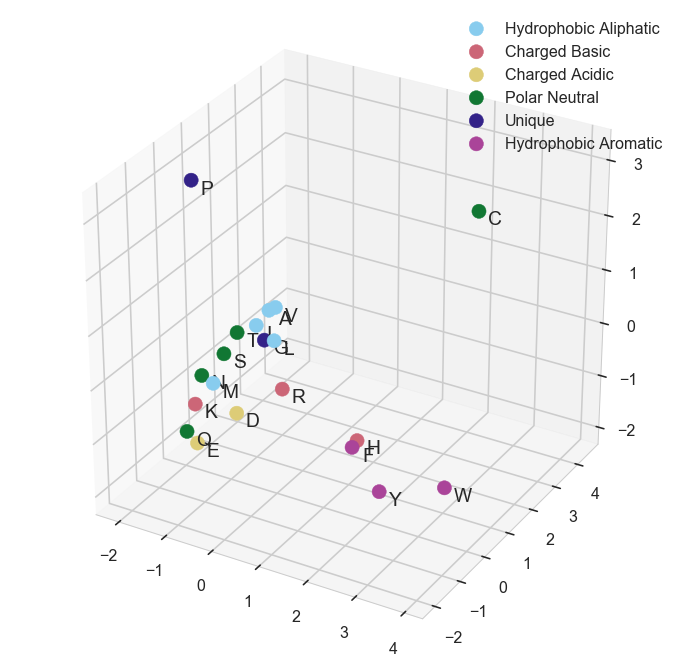

In [19]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')
for i,g in enumerate(aminos2.group2.unique()):
    print(g)
    group = aminos2[aminos2.group2 == g]
    print(group)
    ax.scatter(
        xs=group.x,
        ys=group.y, 
        zs=group.z,
        label=g,
        s=200, 
        c=[palette[i]]*len(group),
        depthshade=False
    )
for i in range(len(aminos2)):
    ax.text(aminos2.x[i]+.2,aminos2.y[i], aminos2.z[i] -.2, aminos2['name'][i])

ax.legend()

Hydrophobic Aliphatic
           x         y         z name       group1                 group2  \
0  -0.160024 -2.014909  0.553458    M  Hydrophobic  Hydrophobic Aliphatic   
13 -0.315306  0.334578  0.902368    A  Hydrophobic  Hydrophobic Aliphatic   
14  0.313284 -0.532105  1.449087    V  Hydrophobic  Hydrophobic Aliphatic   
15  0.283293 -1.189502  1.377812    I  Hydrophobic  Hydrophobic Aliphatic   
19  0.567892 -1.043298  1.112842    L  Hydrophobic  Hydrophobic Aliphatic   

           0         1         2         3         4         5         6  \
0   0.247728  0.291514 -1.549570  1.974147 -1.407926  2.251246 -1.054513   
13 -0.725690 -2.215885 -0.252420  2.081916 -2.244450  0.430945 -0.847809   
14 -1.252083 -0.983887 -0.180283  0.675912 -0.931703  2.231578 -2.035001   
15 -1.069295  0.111497 -0.533891  0.537902 -0.708826  2.765972 -1.857438   
19 -0.416441  0.676983 -1.015993  1.897488 -1.563825  2.653255 -1.595524   

           7         8         9  
0   1.935107  0.479758 

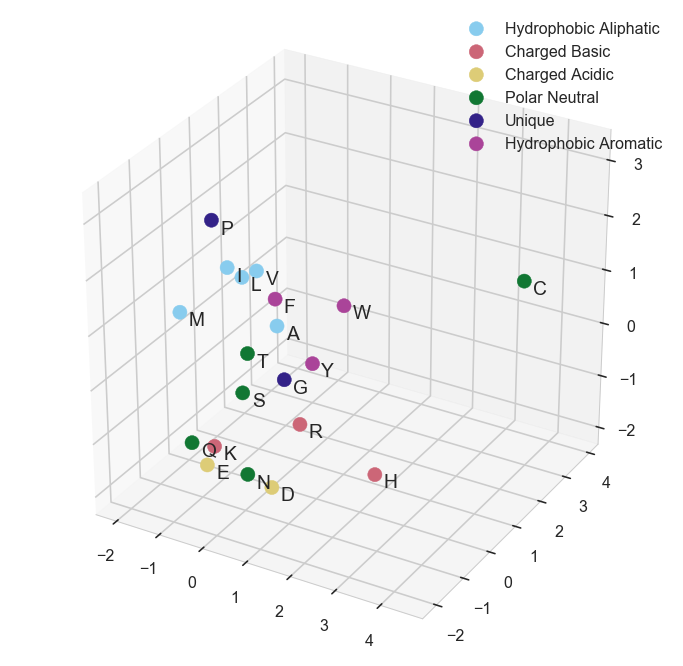

In [20]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')
for i,g in enumerate(aminos2.group2.unique()):
    print(g)
    group = aminos2[aminos2.group2 == g]
    print(group)
    ax.scatter(
        xs=group.y,
        ys=group.x, 
        zs=group.z,
        label=g,
        s=200, 
        c=[palette[i]]*len(group),
        depthshade=False
    )
for i in range(len(aminos2)):
    ax.text(aminos2.y[i]+.2,aminos2.x[i], aminos2.z[i] -.2, aminos2['name'][i])

ax.legend()

Hydrophobic Aliphatic
           x         y         z name       group1                 group2  \
0  -0.160024 -2.014909  0.553458    M  Hydrophobic  Hydrophobic Aliphatic   
13 -0.315306  0.334578  0.902368    A  Hydrophobic  Hydrophobic Aliphatic   
14  0.313284 -0.532105  1.449087    V  Hydrophobic  Hydrophobic Aliphatic   
15  0.283293 -1.189502  1.377812    I  Hydrophobic  Hydrophobic Aliphatic   
19  0.567892 -1.043298  1.112842    L  Hydrophobic  Hydrophobic Aliphatic   

           0         1         2         3         4         5         6  \
0   0.247728  0.291514 -1.549570  1.974147 -1.407926  2.251246 -1.054513   
13 -0.725690 -2.215885 -0.252420  2.081916 -2.244450  0.430945 -0.847809   
14 -1.252083 -0.983887 -0.180283  0.675912 -0.931703  2.231578 -2.035001   
15 -1.069295  0.111497 -0.533891  0.537902 -0.708826  2.765972 -1.857438   
19 -0.416441  0.676983 -1.015993  1.897488 -1.563825  2.653255 -1.595524   

           7         8         9  
0   1.935107  0.479758 

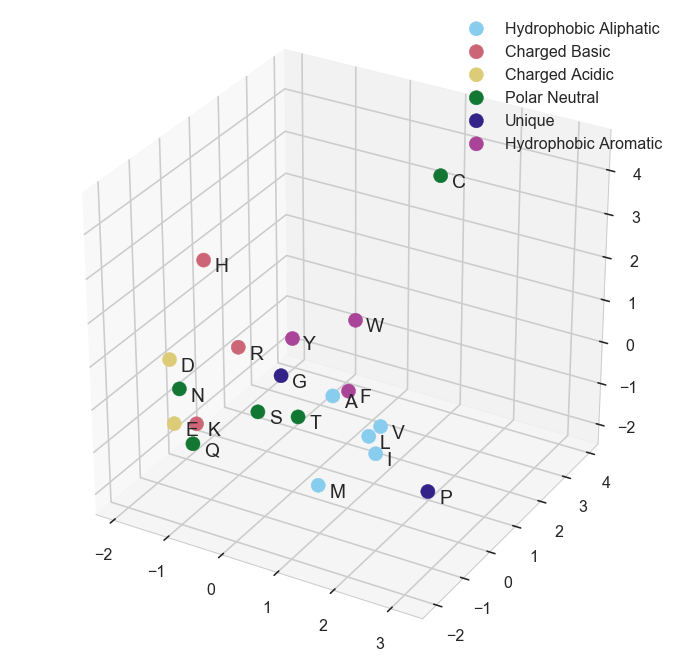

In [21]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')
for i,g in enumerate(aminos2.group2.unique()):
    print(g)
    group = aminos2[aminos2.group2 == g]
    print(group)
    ax.scatter(
        xs=group.z,
        ys=group.x, 
        zs=group.y,
        label=g,
        s=200, 
        c=[palette[i]]*len(group),
        depthshade=False
    )
for i in range(len(aminos2)):
    ax.text(aminos2.z[i]+.2,aminos2.x[i],aminos2.y[i] -.2, aminos2['name'][i])

ax.legend()

Hydrophobic Aliphatic
           x         y         z name       group1                 group2  \
0  -0.160024 -2.014909  0.553458    M  Hydrophobic  Hydrophobic Aliphatic   
13 -0.315306  0.334578  0.902368    A  Hydrophobic  Hydrophobic Aliphatic   
14  0.313284 -0.532105  1.449087    V  Hydrophobic  Hydrophobic Aliphatic   
15  0.283293 -1.189502  1.377812    I  Hydrophobic  Hydrophobic Aliphatic   
19  0.567892 -1.043298  1.112842    L  Hydrophobic  Hydrophobic Aliphatic   

           0         1         2         3         4         5         6  \
0   0.247728  0.291514 -1.549570  1.974147 -1.407926  2.251246 -1.054513   
13 -0.725690 -2.215885 -0.252420  2.081916 -2.244450  0.430945 -0.847809   
14 -1.252083 -0.983887 -0.180283  0.675912 -0.931703  2.231578 -2.035001   
15 -1.069295  0.111497 -0.533891  0.537902 -0.708826  2.765972 -1.857438   
19 -0.416441  0.676983 -1.015993  1.897488 -1.563825  2.653255 -1.595524   

           7         8         9  
0   1.935107  0.479758 

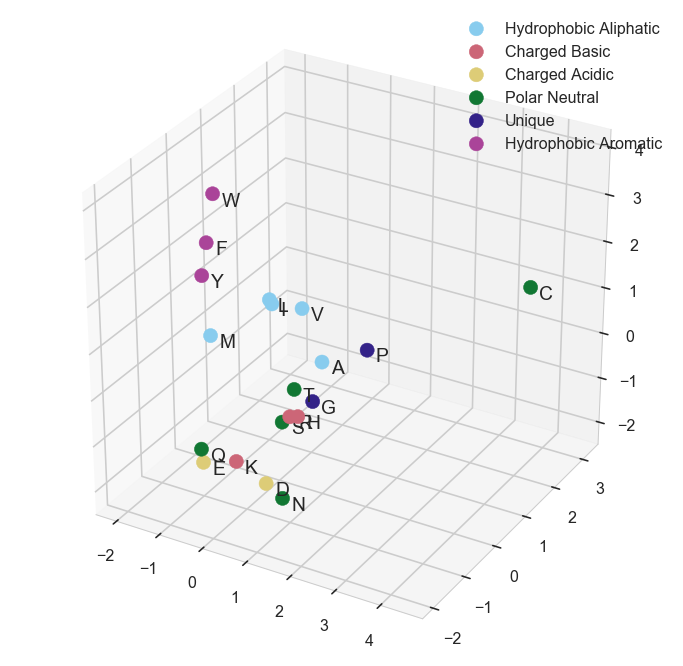

In [22]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')
for i,g in enumerate(aminos2.group2.unique()):
    print(g)
    group = aminos2[aminos2.group2 == g]
    print(group)
    ax.scatter(
        xs=group.y,
        ys=group.z, 
        zs=group.x,
        label=g,
        s=200, 
        c=[palette[i]]*len(group),
        depthshade=False
    )
for i in range(len(aminos2)):
    ax.text(aminos2.y[i]+.2,aminos2.z[i],aminos2.x[i] -.2, aminos2['name'][i])

ax.legend()

Hydrophobic Aliphatic
           x         y         z name       group1                 group2  \
0  -0.160024 -2.014909  0.553458    M  Hydrophobic  Hydrophobic Aliphatic   
13 -0.315306  0.334578  0.902368    A  Hydrophobic  Hydrophobic Aliphatic   
14  0.313284 -0.532105  1.449087    V  Hydrophobic  Hydrophobic Aliphatic   
15  0.283293 -1.189502  1.377812    I  Hydrophobic  Hydrophobic Aliphatic   
19  0.567892 -1.043298  1.112842    L  Hydrophobic  Hydrophobic Aliphatic   

           0         1         2         3         4         5         6  \
0   0.247728  0.291514 -1.549570  1.974147 -1.407926  2.251246 -1.054513   
13 -0.725690 -2.215885 -0.252420  2.081916 -2.244450  0.430945 -0.847809   
14 -1.252083 -0.983887 -0.180283  0.675912 -0.931703  2.231578 -2.035001   
15 -1.069295  0.111497 -0.533891  0.537902 -0.708826  2.765972 -1.857438   
19 -0.416441  0.676983 -1.015993  1.897488 -1.563825  2.653255 -1.595524   

           7         8         9  
0   1.935107  0.479758 

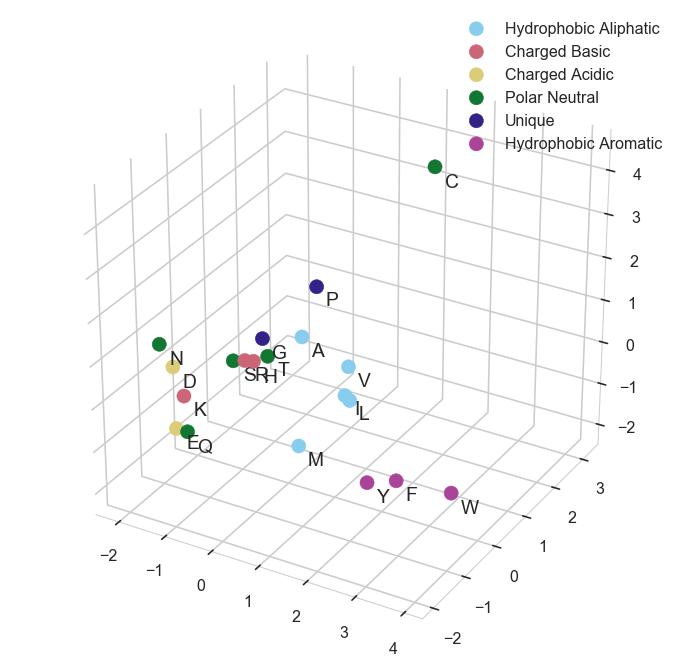

In [23]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')
for i,g in enumerate(aminos2.group2.unique()):
    print(g)
    group = aminos2[aminos2.group2 == g]
    print(group)
    ax.scatter(
        xs=group.x,
        ys=group.z, 
        zs=group.y,
        label=g,
        s=200, 
        c=[palette[i]]*len(group),
        depthshade=False
    )
for i in range(len(aminos2)):
    ax.text(aminos2.x[i]+.2,aminos2.z[i],aminos2.y[i]-.4, aminos2['name'][i])
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.legend()

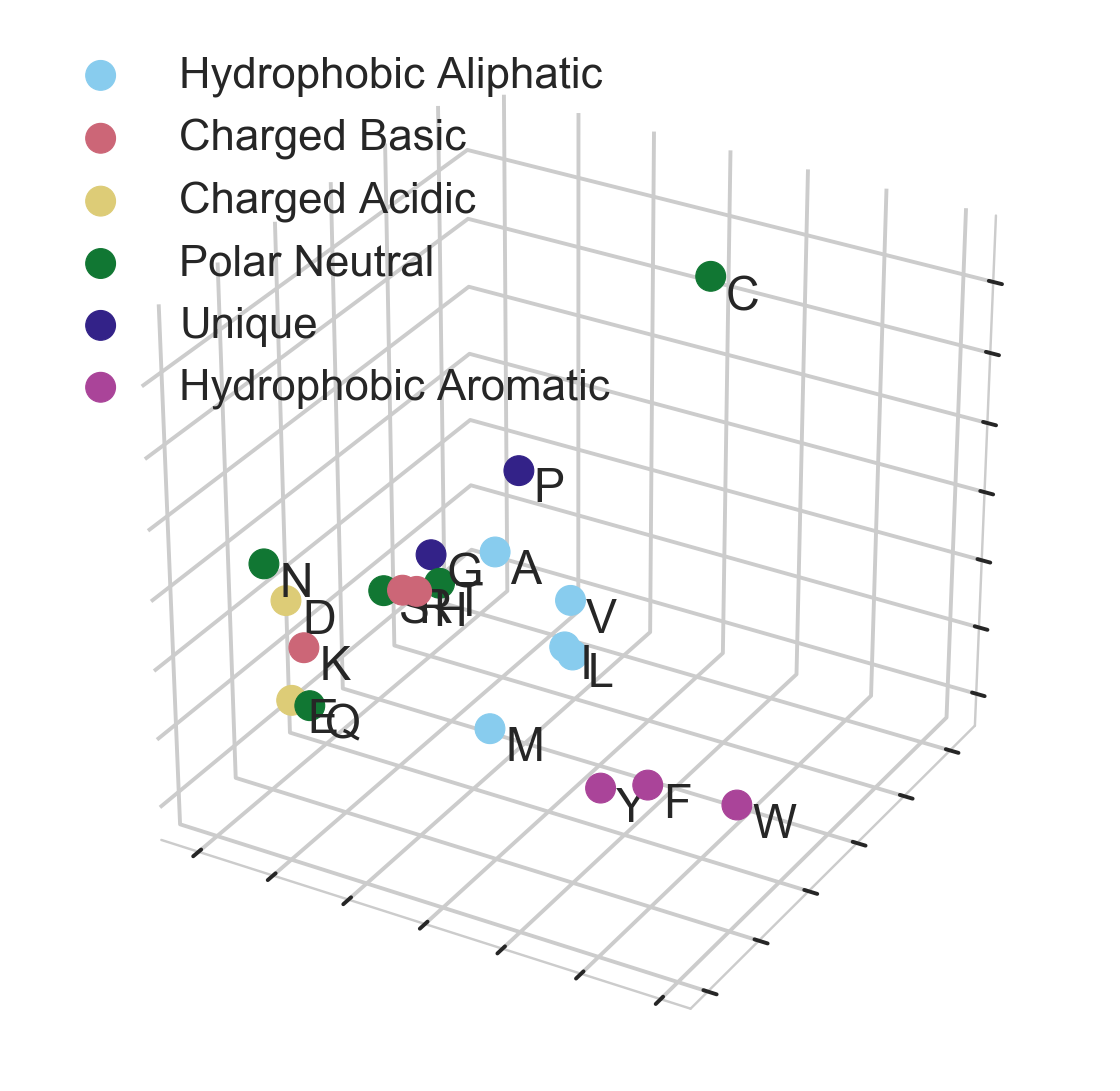

In [24]:
# This last one we will format for the text
set_pub_plot_context(context="poster")
palette = sns.color_palette()
fig = plt.figure(figsize=(8,8), dpi=175)
ax = fig.add_subplot(111,projection='3d')
for i,g in enumerate(aminos2.group2.unique()):
    #print(g)
    group = aminos2[aminos2.group2 == g]
    #print(group)
    ax.scatter(
        xs=group.x,
        ys=group.z, 
        zs=group.y,
        label=g,
        c=[palette[i]]*len(group),
        s=150,
        depthshade=False
    )
for i in range(len(aminos2)):
    ax.text(aminos2.x[i]+.2,aminos2.z[i],aminos2.y[i]-.4, aminos2['name'][i])
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.legend(prop={'size':"18"})
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])
save_for_pub(fig, path="./img/a", dpi=175)